# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
# read data
import numpy as np
from glob import glob
np.array(glob("/data/landmark_images/*"))

array(['/data/landmark_images/train', '/data/landmark_images/test',
       '/data/landmark_images/README.md'], 
      dtype='<U31')

In [2]:
### TODO: Write data loaders for training, validation, and test sets

import torchvision.transforms as transforms
from torchvision import datasets
import os
from torch.utils.data.sampler import SubsetRandomSampler
import torch


## step 1. Specify appropriate transforms, and batch_sizes
batch_size = 20
num_workers = 0

valid_size = 0.2
shuffle = True
random_seed = 2021


## step 2. Specify preprocessing steps: normalization and transformation
std_normalization = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     std_normalization]),
                   'val': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     std_normalization]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     std_normalization])
                  }

## step 3. Transform the data
data_dir = '/data/landmark_images/'
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train/'), transform=data_transforms['train'])
valid_data = datasets.ImageFolder(os.path.join(data_dir, 'train/'), transform=data_transforms['val'])
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test/'), transform=data_transforms['test'])


## step 4. Create sampler for train and validate dataset since they are from the same datasest

dataset_size = len(train_data)
indices = list(range(dataset_size))
if shuffle == True:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
split = int(np.floor(valid_size * dataset_size))
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

## step 5. Define the data loader


trainLoader = torch.utils.data.DataLoader(train_data,
                                          batch_size=batch_size,
                                          sampler=train_sampler, # add the train sampler
                                          num_workers=num_workers)

validLoader = torch.utils.data.DataLoader(valid_data,
                                          batch_size=batch_size,
                                          sampler=valid_sampler,# add the valid sampler
                                          num_workers=num_workers)

testLoader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers)


loaders_scratch = {}
loaders_scratch = {
    'train' : trainLoader,
    'valid' : validLoader,
    'test'  : testLoader
}

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 
- I use the `RandomResizedCrop` and `Resize` to stretch or shrink the image to the pixels of 224x244,since this is the setup of VGG 16.

- Yes. For data augmentations, I use the `RandomHorizontalFlip` or `RandomRotation` to flip or rotate the trainning images.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [5]:
import re
pattern = '^/data/landmark_images/train/(.*)\.(.*)'
classes = [i[1] 
           for i in sorted([re.search(pattern,i).group(1,2) 
                            for i in np.array(glob("/data/landmark_images/train/*")).tolist()])]


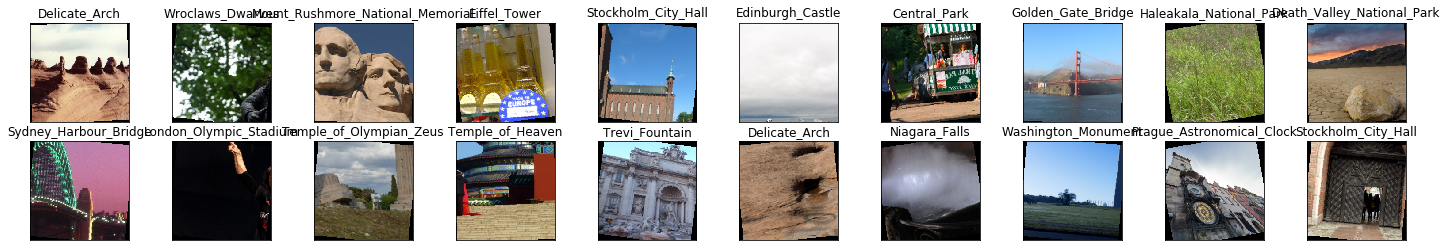

In [6]:
# obtain one batch of training images
dataiter = iter(trainLoader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

### Initialize use_cuda variable

In [7]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [8]:
import torch.nn as nn
## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    return optim.SGD(model.parameters(), lr=0.01)
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 128, kernel_size = 3) 
        self.conv2 = nn.Conv2d(128, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.conv4 = nn.Conv2d(64, 32, 3)
        self.conv5 = nn.Conv2d(32, 16, 3)
        self.conv6 = nn.Conv2d(16, 8, 3)
        self.pool = nn.MaxPool2d(2, 2) 
        # notice that the output dimension of last conv layers should match the dimension of the first fc layer
        self.fc1 = nn.Linear(8*5*5,160)
        self.fc2 = nn.Linear(160,133)
        self.dropout25 = nn.Dropout(p=0.25)
    def forward(self, x):
        ## Define forward behavior
        ## Define forward behavior
        # summary:
        # - 6 convolutional layers
        # - 2 fully connect layers
        x = F.relu(self.conv1(x)) # In: 3x244x244 Out: 128x242x242
        x = self.pool(F.relu(self.conv2(x))) # Out: 64x120x120
        x = self.pool(F.relu(self.conv3(x))) # Out: 64x59x59
        x = self.pool(F.relu(self.conv4(x))) # Out: 32x28x28
        x = self.pool(F.relu(self.conv5(x))) # Out: 16x13x13
        x = self.pool(F.relu(self.conv6(x))) # Out: 8x5x5
        x = x.view(-1, 8 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.dropout25(x) # add a dropout here between two fully connected layer
        x = self.fc2(x)
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [10]:
!pip install torchsummary
from torchsummary import summary
summary(model_scratch, (3, 244, 244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 128, 242, 242]           3,584
            Conv2d-2         [-1, 64, 240, 240]          73,792
         MaxPool2d-3         [-1, 64, 120, 120]               0
            Conv2d-4         [-1, 64, 118, 118]          36,928
         MaxPool2d-5           [-1, 64, 59, 59]               0
            Conv2d-6           [-1, 32, 57, 57]          18,464
         MaxPool2d-7           [-1, 32, 28, 28]               0
            Conv2d-8           [-1, 16, 26, 26]           4,624
         MaxPool2d-9           [-1, 16, 13, 13]               0
           Conv2d-10            [-1, 8, 11, 11]           1,160
        MaxPool2d-11              [-1, 8, 5, 5]               0
           Linear-12                  [-1, 160]          32,160
          Dropout-13                  [-1, 160]               0
           Linear-14                  [

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__

This classification is a challenging classification task. Thus when designing the model structure, I chose to add more layers to increase the depth of the network model so it can learn the details in the picture as much as possible. In detail, I use six convolutional layers and two fully connected layers for the model structure. This is my first try, and after 100 epochs, it achieves 24% accuracy, which is far more better than a random guess.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [11]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            
            ##  zero out the gradients
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # update parameter 
            optimizer.step()           
            ## record average training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # calculate average losses
        train_loss = train_loss/len(trainLoader.sampler)
        valid_loss = valid_loss/len(validLoader.sampler)  


            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [28]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # apply a centered, uniform distribution to the weights
        m.weight.data.uniform_(-0.5, 0.5)
        m.bias.data.fill_(0)
    
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 0.001370 	Validation Loss: 0.004782
Validation loss decreased (inf --> 0.004782).  Saving model ...
Epoch: 2 	Training Loss: 0.001185 	Validation Loss: 0.004693
Validation loss decreased (0.004782 --> 0.004693).  Saving model ...
Epoch: 3 	Training Loss: 0.001165 	Validation Loss: 0.004616
Validation loss decreased (0.004693 --> 0.004616).  Saving model ...
Epoch: 4 	Training Loss: 0.001149 	Validation Loss: 0.004547
Validation loss decreased (0.004616 --> 0.004547).  Saving model ...
Epoch: 5 	Training Loss: 0.001134 	Validation Loss: 0.004482
Validation loss decreased (0.004547 --> 0.004482).  Saving model ...
Epoch: 6 	Training Loss: 0.001117 	Validation Loss: 0.004418
Validation loss decreased (0.004482 --> 0.004418).  Saving model ...
Epoch: 7 	Training Loss: 0.001106 	Validation Loss: 0.004358
Validation loss decreased (0.004418 --> 0.004358).  Saving model ...
Epoch: 8 	Training Loss: 0.001092 	Validation Loss: 0.004303
Validation loss decreased (0.00435

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [29]:
import torch.optim as optim

In [14]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 0.001220 	Validation Loss: 0.004867
Validation loss decreased (inf --> 0.004867).  Saving model ...
Epoch: 2 	Training Loss: 0.001212 	Validation Loss: 0.004834
Validation loss decreased (0.004867 --> 0.004834).  Saving model ...
Epoch: 3 	Training Loss: 0.001203 	Validation Loss: 0.004798
Validation loss decreased (0.004834 --> 0.004798).  Saving model ...
Epoch: 4 	Training Loss: 0.001192 	Validation Loss: 0.004744
Validation loss decreased (0.004798 --> 0.004744).  Saving model ...
Epoch: 5 	Training Loss: 0.001136 	Validation Loss: 0.004060
Validation loss decreased (0.004744 --> 0.004060).  Saving model ...
Epoch: 6 	Training Loss: 0.001019 	Validation Loss: 0.003998
Validation loss decreased (0.004060 --> 0.003998).  Saving model ...
Epoch: 7 	Training Loss: 0.001012 	Validation Loss: 0.003965
Validation loss decreased (0.003998 --> 0.003965).  Saving model ...
Epoch: 8 	Training Loss: 0.001003 	Validation Loss: 0.003983
Epoch: 9 	Training Loss: 0.001000 

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [19]:
# load the saved model with the best performance yet
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.885976


Test Accuracy: 24% (303/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [13]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# I choose to use the same loader used in the sratch model.

loaders_transfer = {
    'train' : trainLoader,
    'valid' : validLoader,
    'test'  : testLoader

}

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [14]:
## TODO: select loss function

import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.Adam(model.fc.parameters(), lr = 0.001)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [15]:
# obtain the total number of classes to specify the last layer in the model.
model_classes = loaders_scratch['train'].dataset.classes
print('The training dataset defines {} classes'.format(len(model_classes)))

The training dataset defines 50 classes


In [16]:
import torchvision.models as models
import torch.nn as nn
## TODO: Specify model architecture

model_transfer = None

## TODO: Specify model architecture

# 1. Take the pretrained model from resnet
model_transfer = models.resnet50(pretrained=True)
# 2. Freeze the parameter in the pretrained model
for param in model_transfer.parameters():
    param.requires_grad = False
# 3. Obtain the input dimension of the fc layer
n_inputs = model_transfer.fc.in_features
# 4. Specify the last fc layer with the input dimension and output dimension(the dog breeds)
last_layer = nn.Linear(n_inputs, len(model_classes))
model_transfer.fc = last_layer 
# 5. use the GPU if possible
if use_cuda:
    model_transfer = model_transfer.cuda()




#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 24658235.64it/s]


__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

ResNet-50 is a pretrained Deep Learning model for image classification of the Convolutional Neural Network(CNN, or ConvNet), which is a class of deep neural networks, most commonly applied to analyzing visual imagery.
For the transferred learning model, I choose to use the `resnet50` as the pre-trained part of the classification model. I fix all the parameters in the resnet model and add the last fully connected layer which is going to be trained by the data. For the last layer, the input dimension is defined by the output dimension of the resnet, and the output dimension is defined by the number of classes we are going to predict, which is 50.
After training, the model achieves a test accuracy of 76% with a test loss of 0.942428.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
# train the model
n_epochs = 50
model_transfer = train(n_epochs, 
                        loaders_scratch, 
                        model_transfer, 
                        get_optimizer_transfer(model_transfer), 
                        criterion_transfer, 
                        use_cuda, 
                        'model_transfer.pt')

Epoch: 1 	Training Loss: 0.000716 	Validation Loss: 0.001755
Validation loss decreased (inf --> 0.001755).  Saving model ...
Epoch: 2 	Training Loss: 0.000459 	Validation Loss: 0.001498
Validation loss decreased (0.001755 --> 0.001498).  Saving model ...
Epoch: 3 	Training Loss: 0.000396 	Validation Loss: 0.001287
Validation loss decreased (0.001498 --> 0.001287).  Saving model ...
Epoch: 4 	Training Loss: 0.000368 	Validation Loss: 0.001231
Validation loss decreased (0.001287 --> 0.001231).  Saving model ...
Epoch: 5 	Training Loss: 0.000350 	Validation Loss: 0.001253
Epoch: 6 	Training Loss: 0.000324 	Validation Loss: 0.001132
Validation loss decreased (0.001231 --> 0.001132).  Saving model ...
Epoch: 7 	Training Loss: 0.000312 	Validation Loss: 0.001158
Epoch: 8 	Training Loss: 0.000304 	Validation Loss: 0.001080
Validation loss decreased (0.001132 --> 0.001080).  Saving model ...
Epoch: 9 	Training Loss: 0.000295 	Validation Loss: 0.001186
Epoch: 10 	Training Loss: 0.000297 	Valida

In [17]:
#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.942428


Test Accuracy: 76% (952/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [22]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    """
    Input:
        img_path: the path for the image to be predicted
        k: top k most likely landmarks
    Output:
        A list of strings of the top k most likely landmarks.
    """
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    img_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     std_normalization])
    # load image
    img = Image.open(img_path)
    # transform it to tensor after the resize and normalization
    img_tensor = img_transforms(img)[None , :]
    # use the GPU is possible
    if use_cuda:
        img_tensor = img_tensor.cuda()
    # get the prediction
    model_transfer.eval()
    output = model_transfer(img_tensor)
    _, preds_tensor = torch.topk(output, k)
    return [classes[i] for i in preds_tensor.cpu().numpy()[0]] 

# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Golden_Gate_Bridge',
 'Forth_Bridge',
 'Dead_Sea',
 'Brooklyn_Bridge',
 'Temple_of_Heaven']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

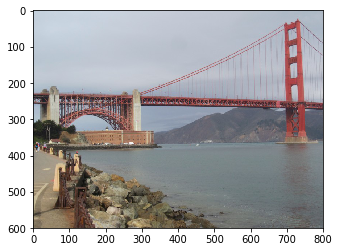

Is this picture of the Golden Gate Bridge, Forth Bridge, Dead Sea?


In [23]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    """
    Input: 
        img_path: the path for the image to be predicted
    Output:
        display image and display landmark predictions
    """
    
    ## TODO: display image and display landmark predictions
    img = Image.open(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    print("Is this picture of the {}, {}, {}?".format(*[i.replace('_',' ') for i in predicted_landmarks]))

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

Here are some possible points for improvement:
- Other architectures can be used for transfer learning.
- More data can be used for training for better accuracy.
- Architecture: higher depth, different hyper parameters tuning.

In [24]:
import os
current_path = os.getcwd()

In [25]:
current_path

'/home/workspace/nd101-c2-landmarks-starter/landmark_project'

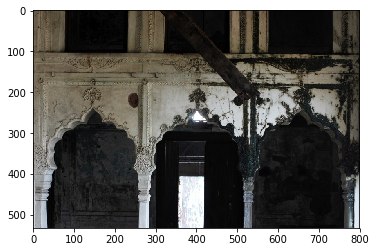

Is this picture of the Taj Mahal, Stockholm City Hall, Temple of Heaven?


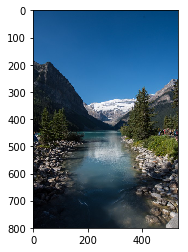

Is this picture of the Banff National Park, Yellowstone National Park, Grand Canyon?


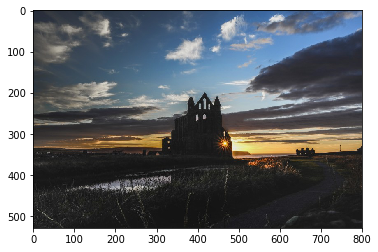

Is this picture of the Stockholm City Hall, Banff National Park, Edinburgh Castle?


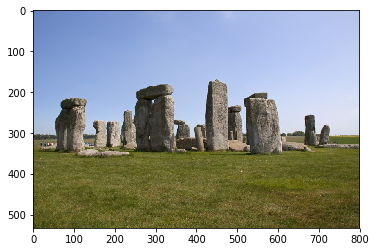

Is this picture of the Stonehenge, Whitby Abbey, Temple of Olympian Zeus?


In [26]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

# 4 images from the testing dataset
for img_path in np.random.choice(np.array(glob("/data/landmark_images/test/*/*")), size=4, replace=False):
    suggest_locations(img_path)


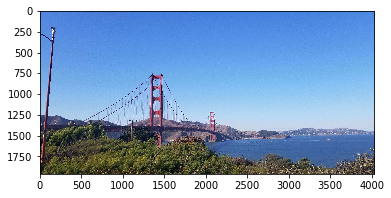

Is this picture of the Golden Gate Bridge, Forth Bridge, Dead Sea?


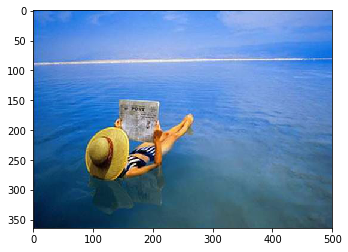

Is this picture of the Great Barrier Reef, Sydney Opera House, Dead Sea?


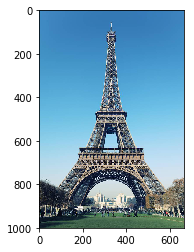

Is this picture of the Eiffel Tower, Stockholm City Hall, Whitby Abbey?


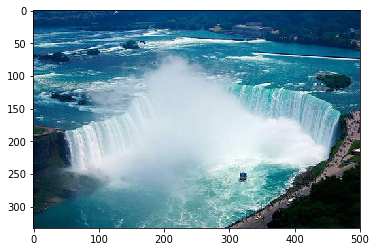

Is this picture of the Niagara Falls, Great Barrier Reef, Gullfoss Falls?


In [27]:
# 4 images from the student upload
for img_path in np.random.choice(np.array(glob("/home/workspace/nd101-c2-landmarks-starter/landmark_project/additional_images/*")), size=4, replace=False):
    suggest_locations(img_path)